In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("spam.csv")

# New Section

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1774,ham,"Its ok chikku, and its my 1 of favourite song....",NaN,NaN,NaN
3749,ham,"Buzz! Hey, my Love ! I think of you and hope y...",NaN,NaN,NaN
576,ham,I'm tired of arguing with you about this week ...,NaN,NaN,NaN
1460,ham,Yalru lyfu astne chikku.. Bt innu mundhe lyf a...,NaN,NaN,NaN
2653,ham,Sorry da:)i was thought of calling you lot of ...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

1. Data cleaning
2. EDA (EXPLORATORY DATA ANALYSIS)
3. Text preprocessing
4. Model building
5. Evaluation
6. Improvements
7. Website

## 1. Data cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
#drop last three columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [7]:
df.sample(5)

,v1,v2
2370,ham,"That day �_ say �_ cut ur hair at paragon, is ..."
395,ham,From here after The performance award is calcu...
2337,ham,Tell your friends what you plan to do on Valen...
4185,ham,"Hmm ok, i'll stay for like an hour cos my eye ..."
3522,ham,Try neva mate!!


In [8]:
#renaming columns
df.rename(columns={'v1':'target','v2':'text'}, inplace=True)

In [9]:
df.sample(5)

,target,text
196,ham,Did u got that persons story
1509,ham,When u love someone Dont make them to love u a...
5109,ham,Oh you got many responsibilities.
2321,ham,Ok...
1055,ham,I'm at work. Please call


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['target'] = encoder.fit_transform(df['target'])

In [12]:
df.head() #spam = 1, ham = 0

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.isnull().sum() #there are no null values

target    0
text      0
dtype: int64

In [14]:
df.duplicated().sum() #409 duplicate values

409

In [15]:
#remove duplicates
df = df.drop_duplicates(keep = 'first') #keeps first duplicate by default

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5163, 2)

## 2.EDA

In [18]:
df.sample(5)

,target,text
351,0,If you're not in my car in an hour and a half ...
1587,0,"Dont search love, let love find U. Thats why i..."
677,0,"Piggy, r u awake? I bet u're still sleeping. I..."
4388,0,"K I'm ready, &lt;#&gt; ?"
4046,1,"Thanks for your ringtone order, reference numb..."


In [19]:
df['target'].value_counts()

0    4516
1     647
Name: target, dtype: int64

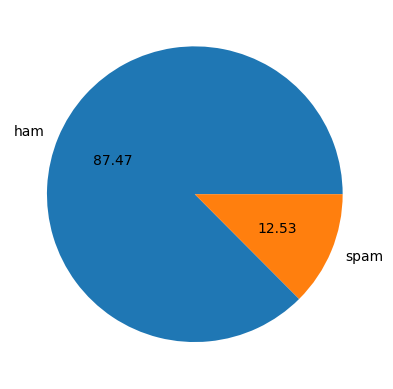

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels = ['ham', 'spam'], autopct='%0.2f')
plt.show()
# data is imbalanced

In [21]:
import nltk

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [23]:
#number of charcters
df["num_characters"] = df['text'].apply(len)

In [24]:
#number of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [25]:
#number of sentences
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [26]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5163.000000,5163.000000,5163.000000
mean,78.811156,18.444122,1.963974
std,58.153491,13.327940,1.448008
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,116.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
df[df['target']==0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.428919,17.123782,1.820195
std,56.356310,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
df[df['target']==1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,647.000000,647.000000,647.000000
mean,137.318393,27.659969,2.967543
std,30.096861,7.038065,1.490069
min,13.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [30]:
#plot histogram
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

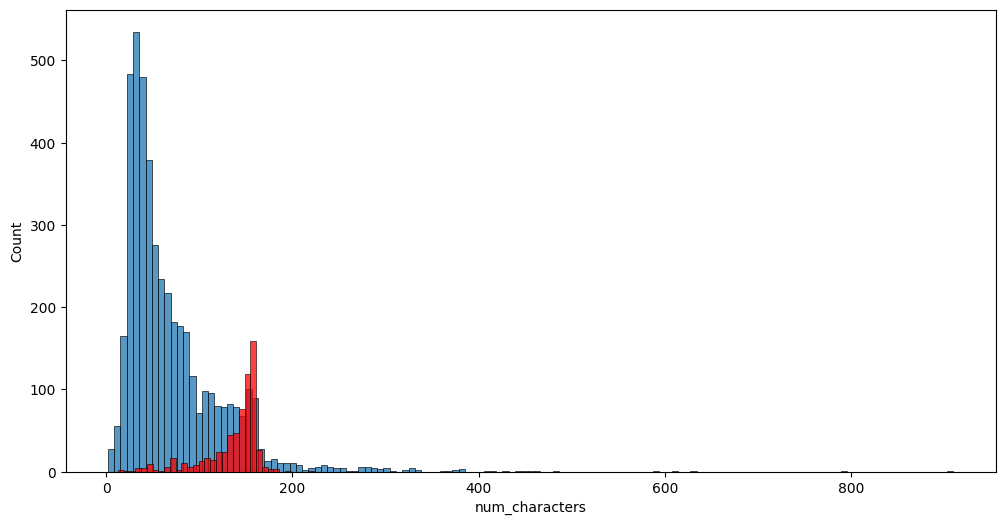

In [31]:
plt.figure(figsize = (12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

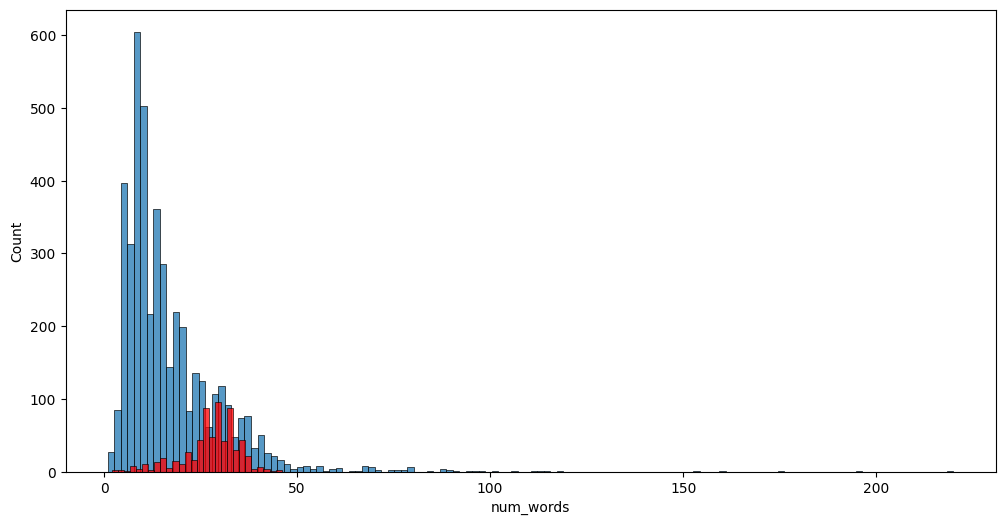

In [32]:
plt.figure(figsize = (12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color = 'red')

<Axes: xlabel='num_sentences', ylabel='Count'>

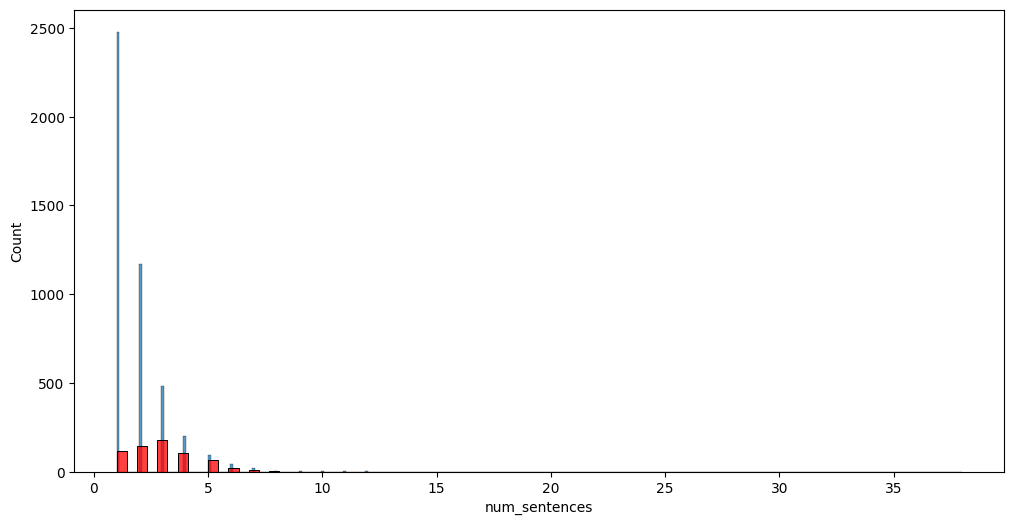

In [33]:
plt.figure(figsize = (12,6))
sns.histplot(df[df['target'] == 0]['num_sentences'])
sns.histplot(df[df['target'] == 1]['num_sentences'], color = 'red')

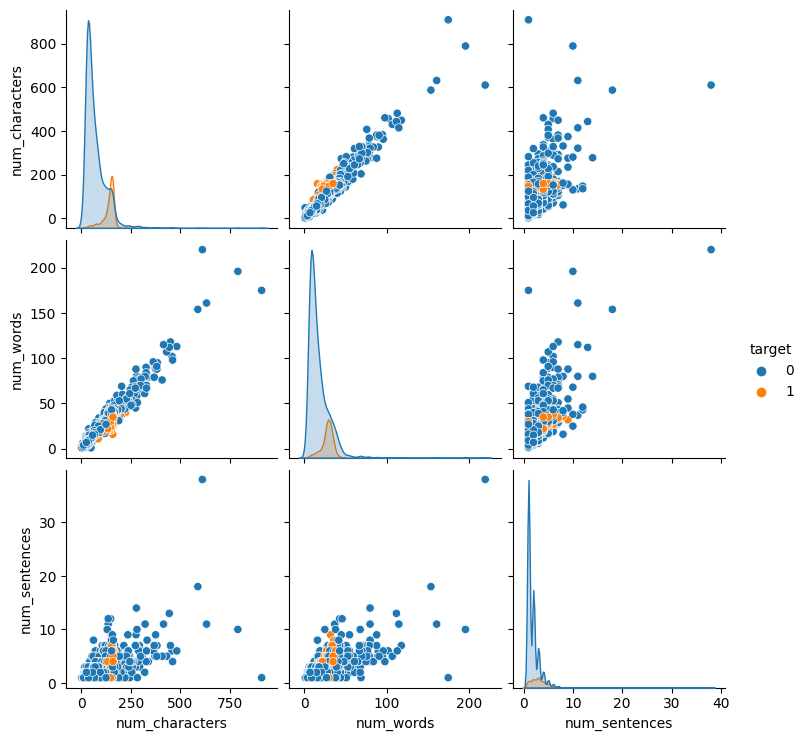

In [34]:
sns.pairplot(df, hue='target')

In [35]:
df.corr() #correlation coefficient

<ipython-input-35-7889763a8d44>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr() #correlation coefficient


,target,num_characters,num_words,num_sentences
target,1.000000,0.380847,0.261752,0.262357
num_characters,0.380847,1.000000,0.966164,0.623719
num_words,0.261752,0.966164,1.000000,0.679952
num_sentences,0.262357,0.623719,0.679952,1.000000


<ipython-input-36-fe43fffaf13b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

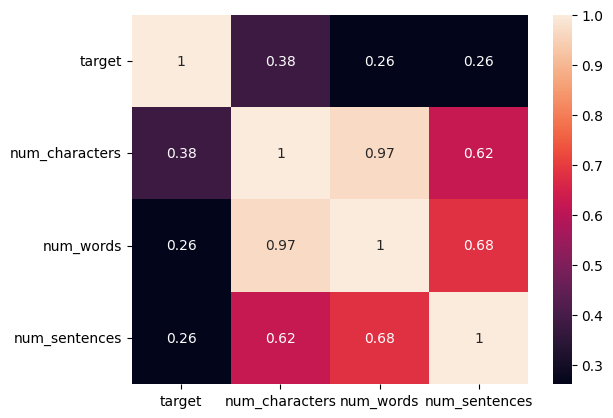

In [36]:
sns.heatmap(df.corr(), annot = True)

In [37]:
#num characters has highest correlation with target so we will keep only num_characters

## 3. Data preprocessing or text preprocessing

* Lower case
* Tokenization
* Removing special characters
* Removing stops words and punctuation
* Stemming (converting similar words into one eg- dance, dancing, danced to dance)

In [38]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [39]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [40]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem("loving")

'love'

In [41]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  lst = []
  for i in text:
    if i.isalnum():
      lst.append(i)

  text = lst[:]
  lst.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      lst.append(i)

  text = lst[:]
  lst.clear()

  for i in text:
    i = ps.stem(i)
    lst.append(i)
  return " ".join(lst)

In [42]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [43]:
transform_text(df['text'][0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [44]:
# Now we will transform the word
df['transformed_text'] = df['text'].apply(transform_text)

In [45]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [46]:
# we will make the word cloud for spam and ham messages
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [47]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" ")) #spam

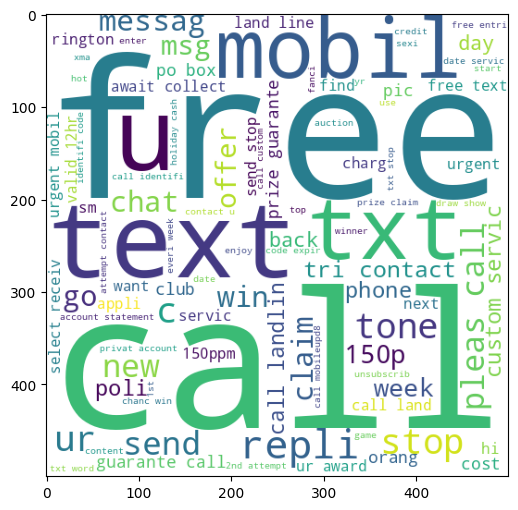

In [48]:
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)

In [49]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" ")) #ham

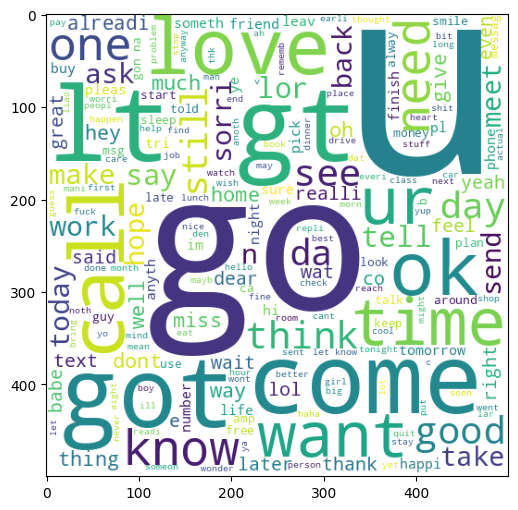

In [50]:
plt.figure(figsize = (15,6))
plt.imshow(ham_wc)

Now we will see the top 30 words in spam and ham

In [51]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [52]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
  #print(msg)
  for word in msg.split():
    spam_corpus.append(word)

In [53]:
len(spam_corpus)

9861

In [54]:
from collections import Counter
Counter(spam_corpus) #this will give us a dictionary of the words and the number of times each word has occured

Counter({'free': 188,
         'entri': 21,
         '2': 155,
         'wkli': 9,
         'comp': 8,
         'win': 46,
         'fa': 2,
         'cup': 3,
         'final': 13,
         'tkt': 2,
         '21st': 1,
         'may': 6,
         'text': 122,
         '87121': 2,
         'receiv': 30,
         'question': 9,
         'std': 6,
         'txt': 140,
         'rate': 26,
         'c': 45,
         'appli': 24,
         '08452810075over18': 1,
         'freemsg': 14,
         'hey': 5,
         'darl': 2,
         '3': 20,
         'week': 49,
         'word': 21,
         'back': 20,
         'like': 12,
         'fun': 8,
         'still': 5,
         'tb': 1,
         'ok': 5,
         'xxx': 10,
         'chg': 2,
         'send': 59,
         'rcv': 2,
         'winner': 13,
         'valu': 7,
         'network': 26,
         'custom': 40,
         'select': 26,
         'receivea': 1,
         'prize': 80,
         'reward': 7,
         'claim': 97,
         'cal

In [55]:
pd.DataFrame(Counter(spam_corpus).most_common(30)) #showing this like a dataframe

,0,1
0,call,316
1,free,188
2,2,155
3,txt,140
4,text,122
5,ur,119
6,u,117
7,mobil,110
8,stop,104
9,repli,103


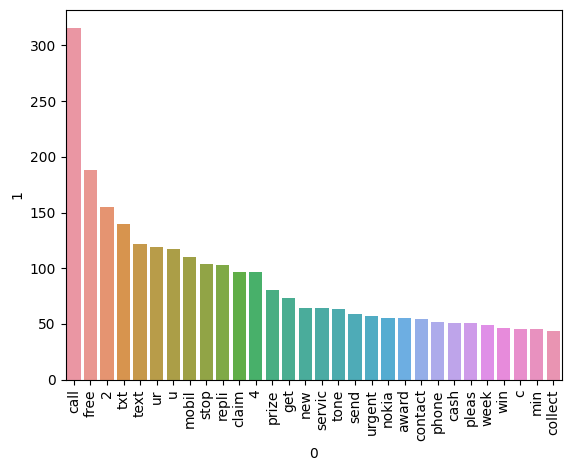

In [56]:
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [57]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
  #print(msg)
  for word in msg.split():
    ham_corpus.append(word)

In [58]:
len(ham_corpus)

35306

In [59]:
Counter(ham_corpus)

Counter({'go': 404,
         'jurong': 1,
         'point': 17,
         'crazi': 10,
         'avail': 13,
         'bugi': 7,
         'n': 120,
         'great': 97,
         'world': 28,
         'la': 7,
         'e': 77,
         'buffet': 2,
         'cine': 7,
         'got': 236,
         'amor': 1,
         'wat': 108,
         'ok': 217,
         'lar': 38,
         'joke': 14,
         'wif': 27,
         'u': 883,
         'oni': 4,
         'dun': 55,
         'say': 127,
         'earli': 33,
         'hor': 2,
         'c': 57,
         'alreadi': 90,
         'nah': 10,
         'think': 149,
         'goe': 26,
         'usf': 10,
         'live': 25,
         'around': 59,
         'though': 26,
         'even': 77,
         'brother': 17,
         'like': 234,
         'speak': 24,
         'treat': 19,
         'aid': 2,
         'patent': 1,
         'per': 9,
         'request': 6,
         'mell': 1,
         'oru': 2,
         'minnaminungint': 1,
         'nur

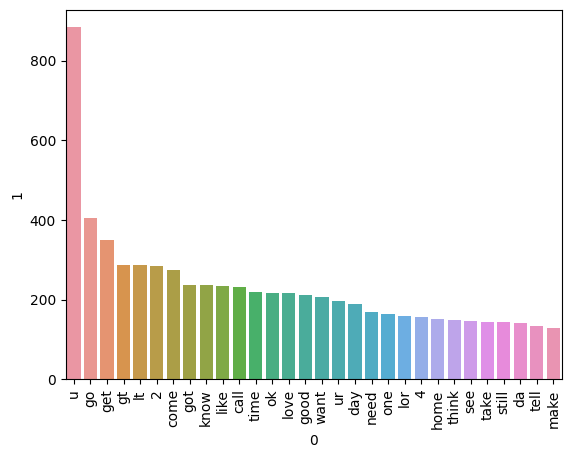

In [60]:
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [61]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## 4. Model Building

We will Naive Bayes algorithm as it is known to perform well on textual data. We will try out other models as well and check which works the best

In [134]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000) # we can also use max_features to get limited bag of words

In [135]:
#X = cv.fit_transform(df['transformed_text']).toarray()
X = tfidf.fit_transform(df['transformed_text']).toarray() #works better

In [136]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)
#we will not scale here as accuracy is imporving but precision is not
#we need more precision here

In [137]:
X.shape

(5163, 3000)

In [138]:
y = df['target'].values

In [139]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 2)

In [140]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [141]:
clfG = GaussianNB()
clfM = MultinomialNB()
clfB = BernoulliNB()

In [142]:
clfG.fit(X_train, y_train)
y_pred1 = clfG.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8676565526145901
[[1180  182]
 [  23  164]]
0.47398843930635837


Before applying max_features = 3000

0.8695932859909619

[[1183  179]

 [  23  164]]

0.478134110787172

In [143]:
clfM.fit(X_train, y_train)
y_pred2 = clfM.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.972885732730794
[[1361    1]
 [  41  146]]
0.9931972789115646


Before applying max_features = 3000

0.9593285990961911

[[1362    0]

 [  63  124]]

1.0


In [144]:
clfB.fit(X_train, y_train)
y_pred3 = clfB.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9786959328599096
[[1359    3]
 [  30  157]]
0.98125


Before applying max_features = 3000

0.9683666881859264

[[1356    6]

 [  43  144]]

0.96

As we have imbalanced data, we need to have high precision scor erather than accuracy

If precision score is 1, it is not giving any false positive

We also wont get any better result from num_characters, num_sentences also doesnt help (we can check using them)

In [145]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb')) #wb - write binary
pickle.dump(clfM, open('model.pkl','wb'))